<a href="https://colab.research.google.com/github/IbrahimHammed/PythonVisualizations/blob/main/DiamondsEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA - Exploratory Data Analysis**

In [198]:
# Import relevant library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
# link to the data needed
url = "https://github.com/IbrahimHammed/PythonVisualizations/blob/main/DiamondPrices2022.csv?raw=true"

In [200]:
# Read data from the link given
dfRaw = pd.read_csv(url)

In [201]:
dfRaw.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [202]:
# Preview the data
dfRaw.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [203]:
# Get general info about the dataset
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [204]:
# Checking for null records

In [205]:
# Method 1
dfRaw.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [206]:
# Method-2
dfRaw.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [207]:
# List unique values of cut column.
# Verdict: It is a good candidate to be used as a dimension
dfRaw.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [208]:
# List unique values of color column.
# Verdict: It is a good candidate to be used as a dimension
dfRaw.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [209]:
# List unique values of table column.
# Verdict: It is NOT a good candidate to be used as a dimension because of the high granularity
dfRaw.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [210]:
# List unique values of clarity column.
# Verdict: It is a good candidate to be used as a dimension
dfRaw.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [211]:
# Wrangling starts here. We are extracting relevant cilumns from dfRaw
dfClean = dfRaw[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x','y','z']]

In [212]:
# Verifying our extraction
dfClean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [213]:
# Review profile of dfClean
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [214]:
# This segment analyses column depth based on some statistical functions
print("Max value in depth is {}".format(dfClean.depth.max()))
print("Min value in depth is {}".format(dfClean.depth.min()))
print("Mean value in depth is {}".format(dfClean.depth.mean()))
print("Median value in depth is {}".format(dfClean.depth.median()))
print("Mode value in depth is {}".format(dfClean.depth.mode()))
print("Standard Deviation value in depth is {}".format(dfClean.depth.std()))

Max value in depth is 79.0
Min value in depth is 43.0
Mean value in depth is 61.74932243293848
Median value in depth is 61.8
Mode value in depth is 0    62.0
Name: depth, dtype: float64
Standard Deviation value in depth is 1.4326262660400568


In [215]:
# This segment analyses column depth based on some statistical functions
print("Max value in column depth is {}".format(dfClean.depth.max()))
print("Min value in column depth is {}".format(dfClean.depth.min()))
print("Mean value in column depth is {}".format(dfClean.depth.mean()))
print("Median value in column depth is {}".format(dfClean.depth.median()))
print("Mode value in column depth is {}".format(dfClean.depth.mode()))
print("Standard Deviation value in column depth is {}".format(dfClean.depth.std()))

Max value in column depth is 79.0
Min value in column depth is 43.0
Mean value in column depth is 61.74932243293848
Median value in column depth is 61.8
Mode value in column depth is 0    62.0
Name: depth, dtype: float64
Standard Deviation value in column depth is 1.4326262660400568


In [216]:
# This segment analyses column table based on some statistical functions
print("Max value in column table is {}".format(dfClean.table.max()))
print("Min value in column table is {}".format(dfClean.table.min()))
print("Mean value in column table is {}".format(dfClean.table.mean()))
print("Median value in column table is {}".format(dfClean.table.median()))
print("Mode value in column table is {}".format(dfClean.table.mode()))
print("Standard Deviation value in column table is {}".format(dfClean.table.std()))

Max value in column table is 95.0
Min value in column table is 43.0
Mean value in column table is 57.45725117253397
Median value in column table is 57.0
Mode value in column table is 0    56.0
Name: table, dtype: float64
Standard Deviation value in column table is 2.234548953274494


In [217]:
# This segment analyses column price based on some statistical functions
print("Max value in column price is {}".format(dfClean.price.max()))
print("Min value in column price is {}".format(dfClean.price.min()))
print("Mean value in column price is {}".format(dfClean.price.mean()))
print("Median value in column price is {}".format(dfClean.price.median()))
print("Mode value in column price is {}".format(dfClean.price.mode()))
print("Standard Deviation value in column price is {}".format(dfClean.price.std()))

Max value in column price is 18823
Min value in column price is 326
Mean value in column price is 3932.734293606214
Median value in column price is 2401.0
Mode value in column price is 0    605
Name: price, dtype: int64
Standard Deviation value in column price is 3989.338446824327


In [218]:
# This segment analyses column x based on some statistical functions
print("Max value in x is {}".format(dfClean.x.max()))
print("Min value in x is {}".format(dfClean.x.min()))
print("Mean value in x is {}".format(dfClean.x.mean()))
print("Median value in x is {}".format(dfClean.x.median()))
print("Mode value in x is {}".format(dfClean.x.mode()))
print("Standard Deviation value in x is {}".format(dfClean.x.std()))

Max value in x is 10.74
Min value in x is 0.0
Mean value in x is 5.731158074263575
Median value in x is 5.7
Mode value in x is 0    4.37
Name: x, dtype: float64
Standard Deviation value in x is 1.1217295857901493


In [219]:
# This segment analyses column y based on some statistical functions
print("Max value in y is {}".format(dfClean.y.max()))
print("Min value in y is {}".format(dfClean.y.min()))
print("Mean value in y is {}".format(dfClean.y.mean()))
print("Median value in y is {}".format(dfClean.y.median()))
print("Mode value in y is {}".format(dfClean.y.mode()))
print("Standard Deviation value in y is {}".format(dfClean.y.std()))

Max value in y is 58.9
Min value in y is 0.0
Mean value in y is 5.73452644458039
Median value in y is 5.71
Mode value in y is 0    4.34
Name: y, dtype: float64
Standard Deviation value in y is 1.142102919282182


In [220]:
# This segment analyses column z based on some statistical functions
print("Max value in z is {}".format(dfClean.z.max()))
print("Min value in z is {}".format(dfClean.z.min()))
print("Mean value in z is {}".format(dfClean.z.mean()))
print("Median value in z is {}".format(dfClean.z.median()))
print("Mode value in z is {}".format(dfClean.z.mode()))
print("Standard Deviation value in z is {}".format(dfClean.z.std()))

Max value in z is 31.8
Min value in z is 0.0
Mean value in z is 3.5387295849322435
Median value in z is 3.53
Mode value in z is 0    2.7
Name: z, dtype: float64
Standard Deviation value in z is 0.7056794713896836


In [221]:
# We can't do correlation analysis on dfClean because of the presence of text columns. So, we need to either encode those
# categorical columns or extract the numeric ones. We chose the latter because of time
dfCorrelation = dfClean[['carat','table', 'price', 'depth', 'x', 'y', 'z']]

In [222]:
# SHowing the dimension of dfClean, dfRaw and dfCorrelation
print("dfRaw dimension: {}".format(dfRaw.shape))
print("dfClean dimension: {}".format(dfClean.shape))
print("dfCorrelation dimension: {}".format(dfCorrelation.shape))

dfRaw dimension: (53943, 11)
dfClean dimension: (53943, 10)
dfCorrelation dimension: (53943, 7)


In [223]:
# Some basic analysis
# record volume by cut
dfClean.cut.value_counts()

,count
cut,
Ideal,21551
Premium,13793
Very Good,12083
Good,4906
Fair,1610


In [224]:
dfClean.color.value_counts()

,count
color,
G,11292
E,9799
F,9543
H,8304
D,6775
I,5422
J,2808


In [225]:
# Clarity summary
dfClean.clarity.value_counts()

,count
clarity,
SI1,13067
VS2,12259
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [226]:
# correlation analysis
dfCorrelation.corr()

,carat,table,price,depth,x,y,z
carat,1.000000,0.181602,0.921591,0.028234,0.975093,0.951721,0.953387
table,0.181602,1.000000,0.127118,-0.295798,0.195333,0.183750,0.150915
price,0.921591,0.127118,1.000000,-0.010630,0.884433,0.865419,0.861249
depth,0.028234,-0.295798,-0.010630,1.000000,-0.025289,-0.029340,0.094927
x,0.975093,0.195333,0.884433,-0.025289,1.000000,0.974701,0.970771
y,0.951721,0.183750,0.865419,-0.029340,0.974701,1.000000,0.952005
z,0.953387,0.150915,0.861249,0.094927,0.970771,0.952005,1.000000


<Axes: >

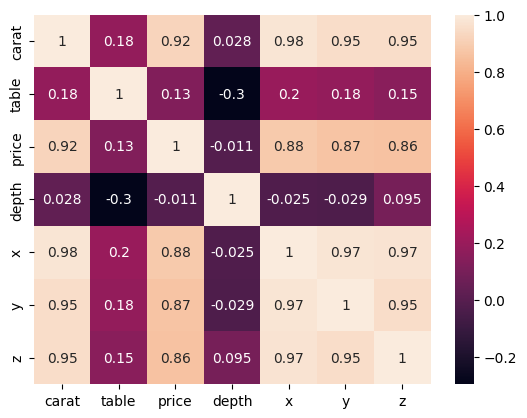

In [227]:
sns.heatmap(dfCorrelation.corr(), annot=True)

In [228]:
# Chart requests
# Dimensions vs count, sum, mean, median, mode, std, var, max, min
# Dimensions vs price, carats
# Scatter diagram carat vs other relevant columns

In [229]:
dfClean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**ANALYSE CUT COLUMN**

In [230]:
dfClean.groupby('cut')['carat'].count()

,carat
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13793
Very Good,12083


In [231]:
data = dfClean.groupby('cut')['carat'].count()

In [232]:
data

,carat
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13793
Very Good,12083


**Please note that in this segment, I have used 3 different methods to generate Bar, Horizontal Bar, Line and Pie charts using Pandas Plot Method, Matplotlib Method and Seaborn Method. You can reproduce similar charts for the rest of the data analysis to hone your skills. **

<Axes: title={'center': 'Count of Carats by Cut'}, xlabel='Cut', ylabel='Count'>

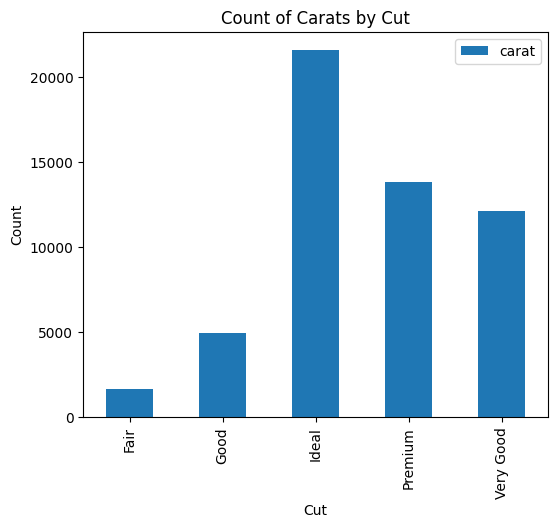

In [233]:
# Method: Pandas Method
# Type: bar chart

data.plot(
    kind='bar',
    figsize=(6,5),
    title='Count of Carats by Cut',
    xlabel='Cut',
    ylabel='Count',
    fontsize=10,
    legend=True
    )

Text(0, 0.5, 'Count')

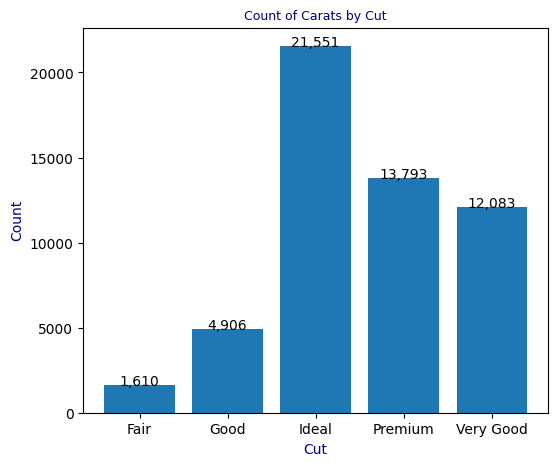

In [234]:
# Method: Matplotlib.pyplot
# Type: Bar chart

fig, ax = plt.subplots()

fig.set_size_inches(6,5)

ax.bar(
    data.index,
    data.values
    )

# Indicate values on the bar chart
for i, value in enumerate(data.values):
    formattedValue = "{:,}".format(value)
    plt.text(i, value + 1, str(formattedValue), ha='center', fontsize=10)

ax.set_title('Count of Carats by Cut', fontsize=9, color="navy")
ax.set_xlabel('Cut', fontsize=10, color="navy")
ax.set_ylabel('Count', fontsize=10, color="navy")

Text(0.5, 1.0, 'Count of Carats by Cut')

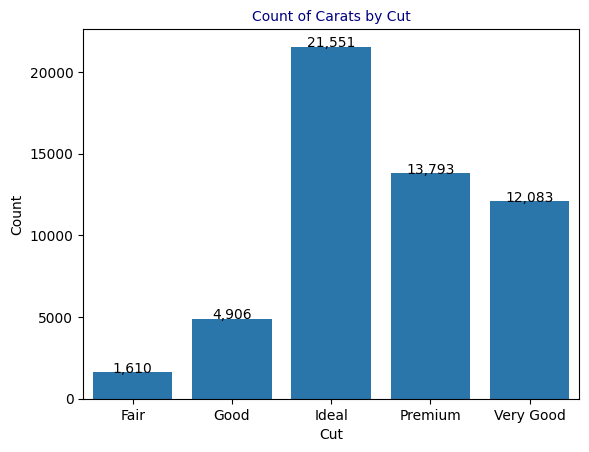

In [235]:
# Chart Method: Seaborn
# Type: Bar

sns.barplot(
    x=data.index,
    y=data.values,
    orient='v',
    saturation=0.85
    )

# Indicate values on the bar chart
for i, value in enumerate(data.values):
    formattedValue = "{:,}".format(value)
    plt.text(i, value + 1, str(formattedValue), ha='center', fontsize=10)

plt.xlabel('Cut', fontsize=10, color="black"),
plt.ylabel('Count', fontsize=10, color="black"),
plt.title('Count of Carats by Cut', fontsize=10, color="navy")

<Axes: title={'center': 'Count of Carats by Cut'}, xlabel='Cut', ylabel='Count'>

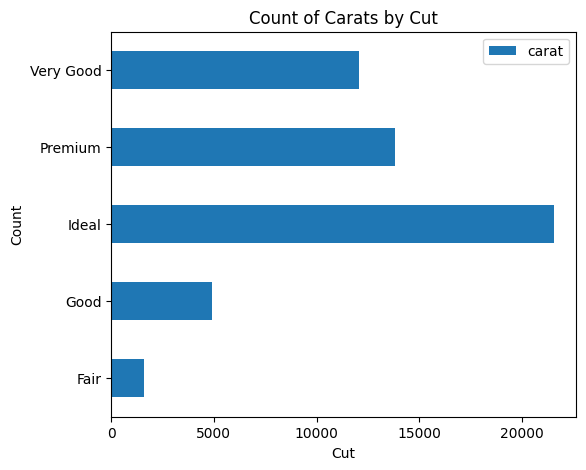

In [236]:
# Method: Pandas Method
# Type: Horizontal bar chart

data.plot(
    kind='barh',
    figsize=(6,5),
    title='Count of Carats by Cut',
    xlabel='Cut',
    ylabel='Count',
    fontsize=10,
    legend=True
    )

Text(0, 0.5, 'Count')

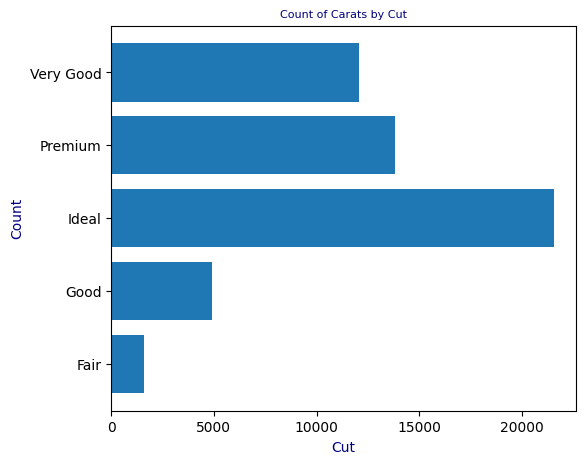

In [237]:
# Method: Matplotlib.pyplot
# Type: Horizontal Bar chart

fig, ax = plt.subplots()

fig.set_size_inches(6,5)

ax.barh(
    data.index,
    data.values
    )

# # Indicate values on the bar chart
# for i, value in enumerate(data.values):
#     formattedValue = "{:,}".format(value)
#     plt.text(i, value + 1, str(formattedValue), ha='center', fontsize=7)

ax.set_title('Count of Carats by Cut', fontsize=8, color="navy")
ax.set_xlabel('Cut', fontsize=10, color="navy")
ax.set_ylabel('Count', fontsize=10, color="navy")

<Axes: ylabel='cut'>

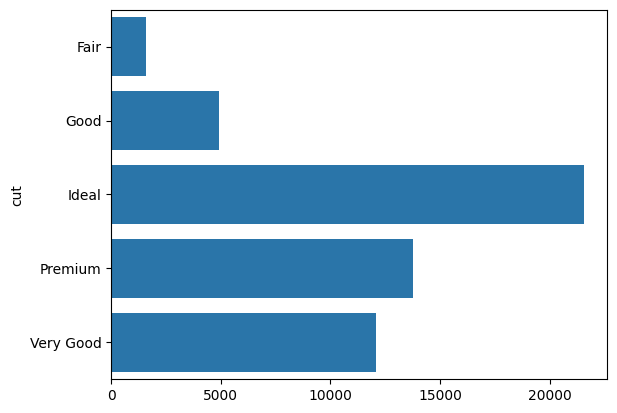

In [238]:
# Method : Seaborn
# Type: Horizontal Bar

sns.barplot(
    x=data.values,
    y=data.index,
    orient='h',
    saturation=0.85
    )


<Axes: title={'center': 'Count of Carats by Cut'}, xlabel='Cut', ylabel='Count'>

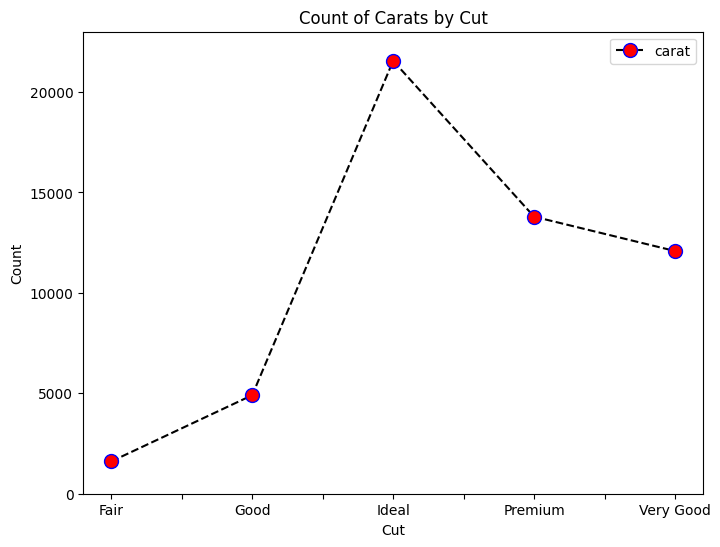

In [239]:
# Method: Pandas Method
# Type: Line chart

data.plot(
    x=data.index,
    y=data.values,
    kind='line',
    figsize=(8,6),
    title='Count of Carats by Cut',
    xlabel='Cut',
    ylabel='Count',
    fontsize=10,
    ylim=(0, 23000),
    legend=True,
    marker = 'o',
    markersize = 10,
    markerfacecolor = 'red',
    markeredgecolor = 'blue',
    markeredgewidth = 1,
    linestyle = '--',
    color = 'black'
    )

Text(0, 0.5, 'Count')

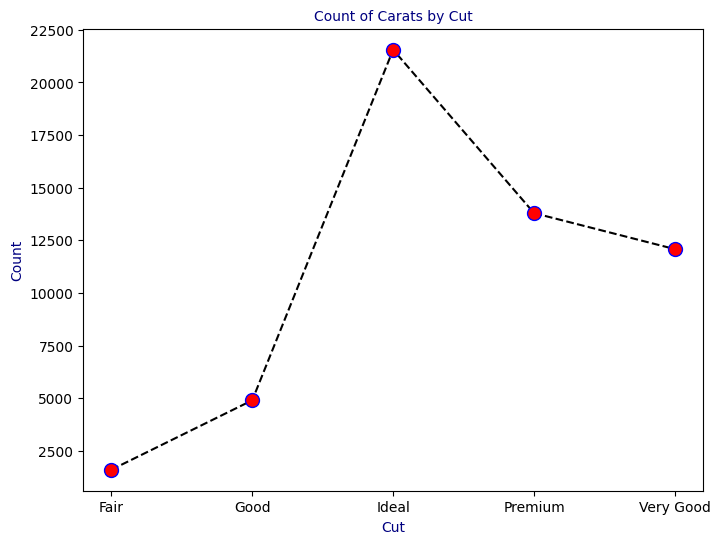

In [240]:
# Method: Matplotlib Method
# Type: Line chart

fig, ax = plt.subplots()

fig.set_size_inches(8,6)

plt.plot(
    data.index,
    data.values,
    marker = 'o',
    markersize = 10,
    markerfacecolor = 'red',
    markeredgecolor = 'blue',
    markeredgewidth = 1,
    linestyle = '--',
    color = 'black'
    )

ax.set_title('Count of Carats by Cut', fontsize=10, color="navy")
ax.set_xlabel('Cut', fontsize=10, color="navy")
ax.set_ylabel('Count', fontsize=10, color="navy")


Text(0, 0.5, 'Count')

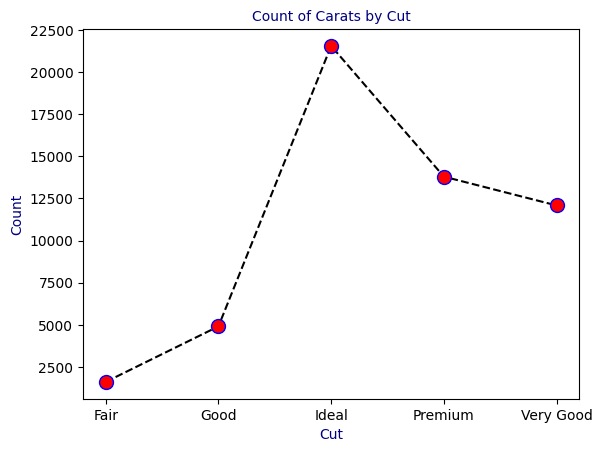

In [241]:
# Method: Seaborn Method
# Type: Line chart

sns.lineplot(
    x=data.index,
    y=data.values,
    marker = 'o',
    markersize = 10,
    markerfacecolor = 'red',
    markeredgecolor = 'blue',
    markeredgewidth = 1,
    linestyle = '--',
    color = 'black'
)

plt.title('Count of Carats by Cut', fontsize=10, color="navy")
plt.xlabel('Cut', fontsize=10, color="navy")
plt.ylabel('Count', fontsize=10, color="navy")

<Axes: title={'center': 'Count of Carats by Cut'}, ylabel='carat'>

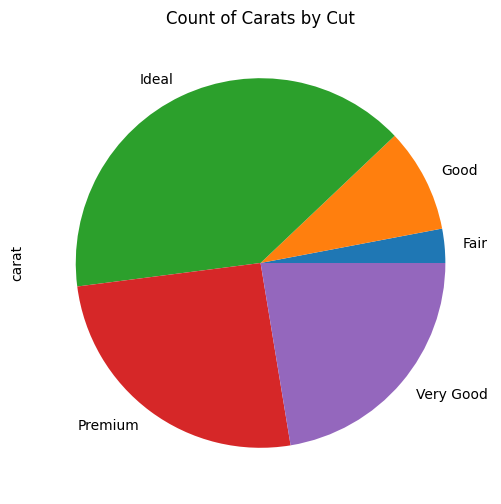

In [242]:
# Method: Pandas Method
# Type: Pie chart

data.plot(
    x=data.index,
    y=data.values,
    kind='pie',
    figsize=(8,6),
    title='Count of Carats by Cut'
    )

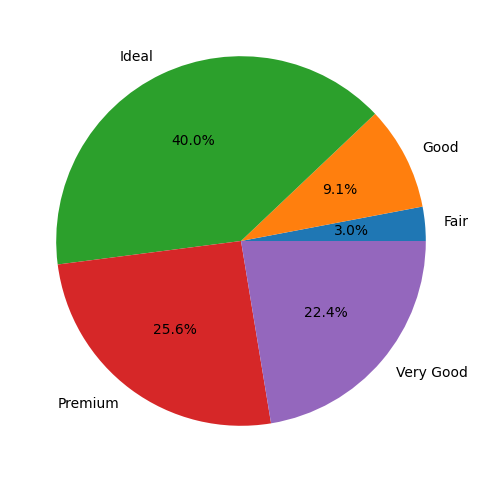

In [243]:
# Method: Matplotlib Method
# Type: Pie chart

fig, ax = plt.subplots()

plt.pie(
    data.values,
    labels=data.index,
    autopct='%1.1f%%'
)

fig.set_size_inches(8,6)

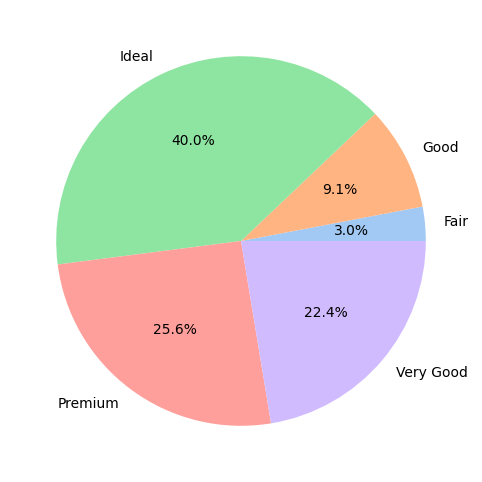

In [244]:
# Method: Seaborn Method
# Type: Pie chart

fig, ax = plt.subplots()

# Define Seaborn color palette to use
mycolors = sns.color_palette('pastel')[0:5]

plt.pie(
    data.values,
    labels=data.index,
    colors=mycolors,
    autopct='%1.1f%%'
)

fig.set_size_inches(8,6)


In [245]:
# This presents a summary of count of carat grouped by cut and color
dfClean.groupby(['cut', 'color'])['carat'].count()

cut        color
Fair       D         163
           E         224
           F         312
           G         314
           H         303
           I         175
           J         119
Good       D         662
           E         933
           F         909
           G         871
           H         702
           I         522
           J         307
Ideal      D        2834
           E        3903
           F        3826
           G        4884
           H        3115
           I        2093
           J         896
Premium    D        1603
           E        2338
           F        2332
           G        2924
           H        2360
           I        1428
           J         808
Very Good  D        1513
           E        2401
           F        2164
           G        2299
           H        1824
           I        1204
           J         678
Name: carat, dtype: int64

In [246]:
# This presents a summary of count of carat grouped by cut, color and clarity
dfClean.groupby(['cut', 'color', 'clarity'])['carat'].count()

cut        color  clarity
Fair       D      I1           4
                  IF           3
                  SI1         58
                  SI2         56
                  VS1          5
                            ... 
Very Good  J      SI2        128
                  VS1        120
                  VS2        184
                  VVS1        19
                  VVS2        29
Name: carat, Length: 276, dtype: int64

In [247]:
# This presents a summary of maximum value of carat grouped by
dfClean.groupby('cut')['carat'].max()

,carat
cut,
Fair,5.01
Good,3.01
Ideal,3.50
Premium,4.01
Very Good,4.00


In [248]:
# This presents a summary of maximum value of carat grouped by cut and color
dfClean.groupby(['cut', 'color'])['carat'].max()

cut        color
Fair       D        3.40
           E        2.04
           F        2.58
           G        2.60
           H        4.13
           I        3.02
           J        5.01
Good       D        2.04
           E        3.00
           F        2.67
           G        2.80
           H        3.01
           I        3.01
           J        3.00
Ideal      D        2.75
           E        2.28
           F        2.45
           G        2.54
           H        3.50
           I        3.22
           J        3.01
Premium    D        2.57
           E        3.05
           F        3.01
           G        3.01
           H        3.24
           I        4.01
           J        4.01
Very Good  D        2.58
           E        2.51
           F        2.48
           G        2.52
           H        3.00
           I        4.00
           J        2.74
Name: carat, dtype: float64

In [249]:
# This sort of summary, though nice, isn't relevant in this context. Beware of just using all available calculations to dazzle
dfClean.groupby('cut')['carat'].sum()

,carat
cut,
Fair,1684.28
Good,4166.10
Ideal,15146.84
Premium,12302.37
Very Good,9743.40


In [250]:
# This presents a summary of maximum value of price
dfClean.groupby('cut')['price'].max()

,price
cut,
Fair,18574
Good,18788
Ideal,18806
Premium,18823
Very Good,18818


In [251]:
# This presents a summary of minimum value of price
dfClean.groupby('cut')['price'].min()

,price
cut,
Fair,337
Good,327
Ideal,326
Premium,326
Very Good,336


In [252]:
# This presents a summary of average value of price
dfClean.groupby('cut')['price'].mean()

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4583.992605
Very Good,3981.658529


In [253]:
# This presents a summary of price based on a number of metrics grouped by cut column
dfClean.groupby('cut')['price'].agg(['min', 'max', 'mean', 'median', 'std', 'var', 'count', 'sum'])

,min,max,mean,median,std,var,count,sum
cut,,,,,,,,
Fair,337,18574,4358.757764,3282.0,3560.386612,1.267635e+07,1610,7017600
Good,327,18788,3928.864452,3050.5,3681.589584,1.355410e+07,4906,19275009
Ideal,326,18806,3457.541970,1810.0,3808.401172,1.450392e+07,21551,74513487
Premium,326,18823,4583.992605,3183.0,4348.945326,1.891333e+07,13793,63227010
Very Good,336,18818,3981.658529,2649.0,3935.715048,1.548985e+07,12083,48110380


In [254]:
# Same operation is being performed here but we are keeping the result in a variable useful in later analysis
dfConsolidatedAnalysis = dfClean.groupby('cut')['price'].agg(['min', 'max', 'mean', 'median', 'std', 'var', 'count', 'sum'])

In [255]:
dfConsolidatedAnalysis

,min,max,mean,median,std,var,count,sum
cut,,,,,,,,
Fair,337,18574,4358.757764,3282.0,3560.386612,1.267635e+07,1610,7017600
Good,327,18788,3928.864452,3050.5,3681.589584,1.355410e+07,4906,19275009
Ideal,326,18806,3457.541970,1810.0,3808.401172,1.450392e+07,21551,74513487
Premium,326,18823,4583.992605,3183.0,4348.945326,1.891333e+07,13793,63227010
Very Good,336,18818,3981.658529,2649.0,3935.715048,1.548985e+07,12083,48110380


In [256]:
dfConsolidatedAnalysis[['min', 'max']]

,min,max
cut,,
Fair,337,18574
Good,327,18788
Ideal,326,18806
Premium,326,18823
Very Good,336,18818
